# Case study on Supervised learning
Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

# 1.Read the dataset to the python environment.

In [33]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
data=pd.read_excel('iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2.Do necessary pre-processing steps.

### Handle missing values--:

In [7]:
#check for missing values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are missing values in sepal length, sepal width and petal length column.

In [8]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

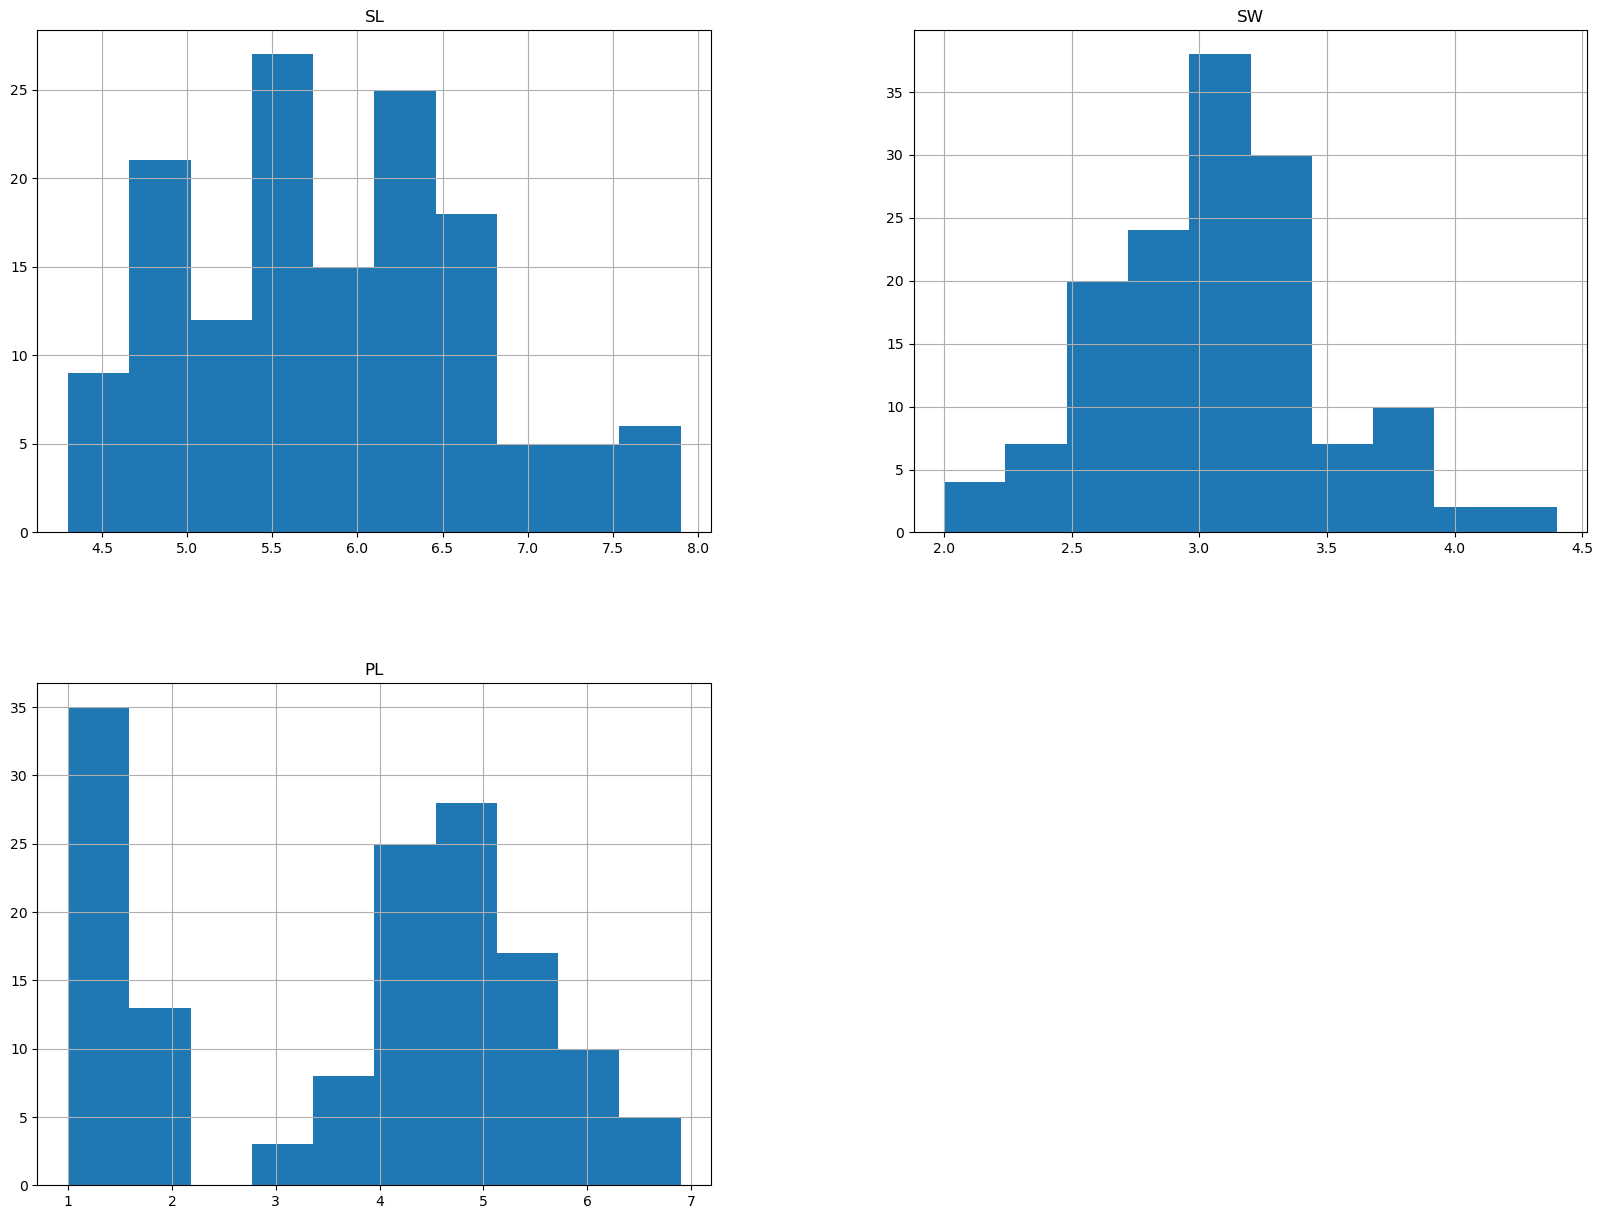

In [9]:
#check for skewness
freqgraph=data[['SL','SW','PL']]
freqgraph.hist(figsize=(20,15))
plt.show()

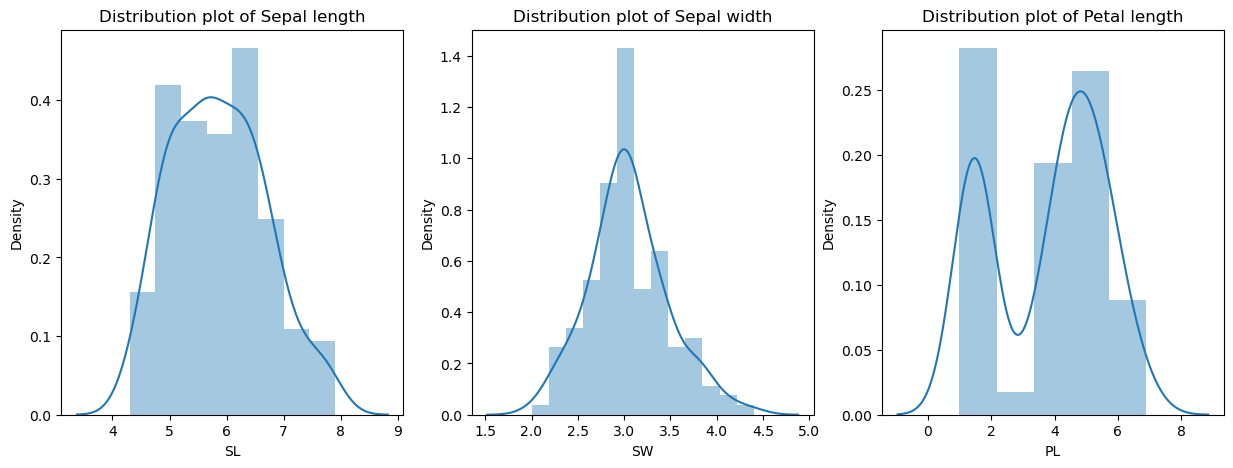

In [10]:
plt.figure(figsize = (15,5))

#distribution plot for Sepal length
plt.subplot(1,3,1)
sns.distplot(data.SL)
plt.title('Distribution plot of Sepal length')

#distribution plot for Sepal width
plt.subplot(1,3,2)
sns.distplot(data.SW)
plt.title('Distribution plot of Sepal width')

#distribution plot for Petal length
plt.subplot(1,3,3)
sns.distplot(data.PL)
plt.title('Distribution plot of Petal length')

plt.show()

We could fill missing values with mean in Sepal length and Sepal width column, and with median in Petal length column.

In [11]:
#filling SL column with the mean
data['SL']=data['SL'].fillna(data['SL'].mean())

#filling SW column with the mean
data['SW']=data['SW'].fillna(data['SW'].mean())

#filling PL column with the median
data['PL']=data['PL'].fillna(data['PL'].median())

In [12]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

All the missing values are filled.

### Handle Outliers-:

In [13]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [14]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

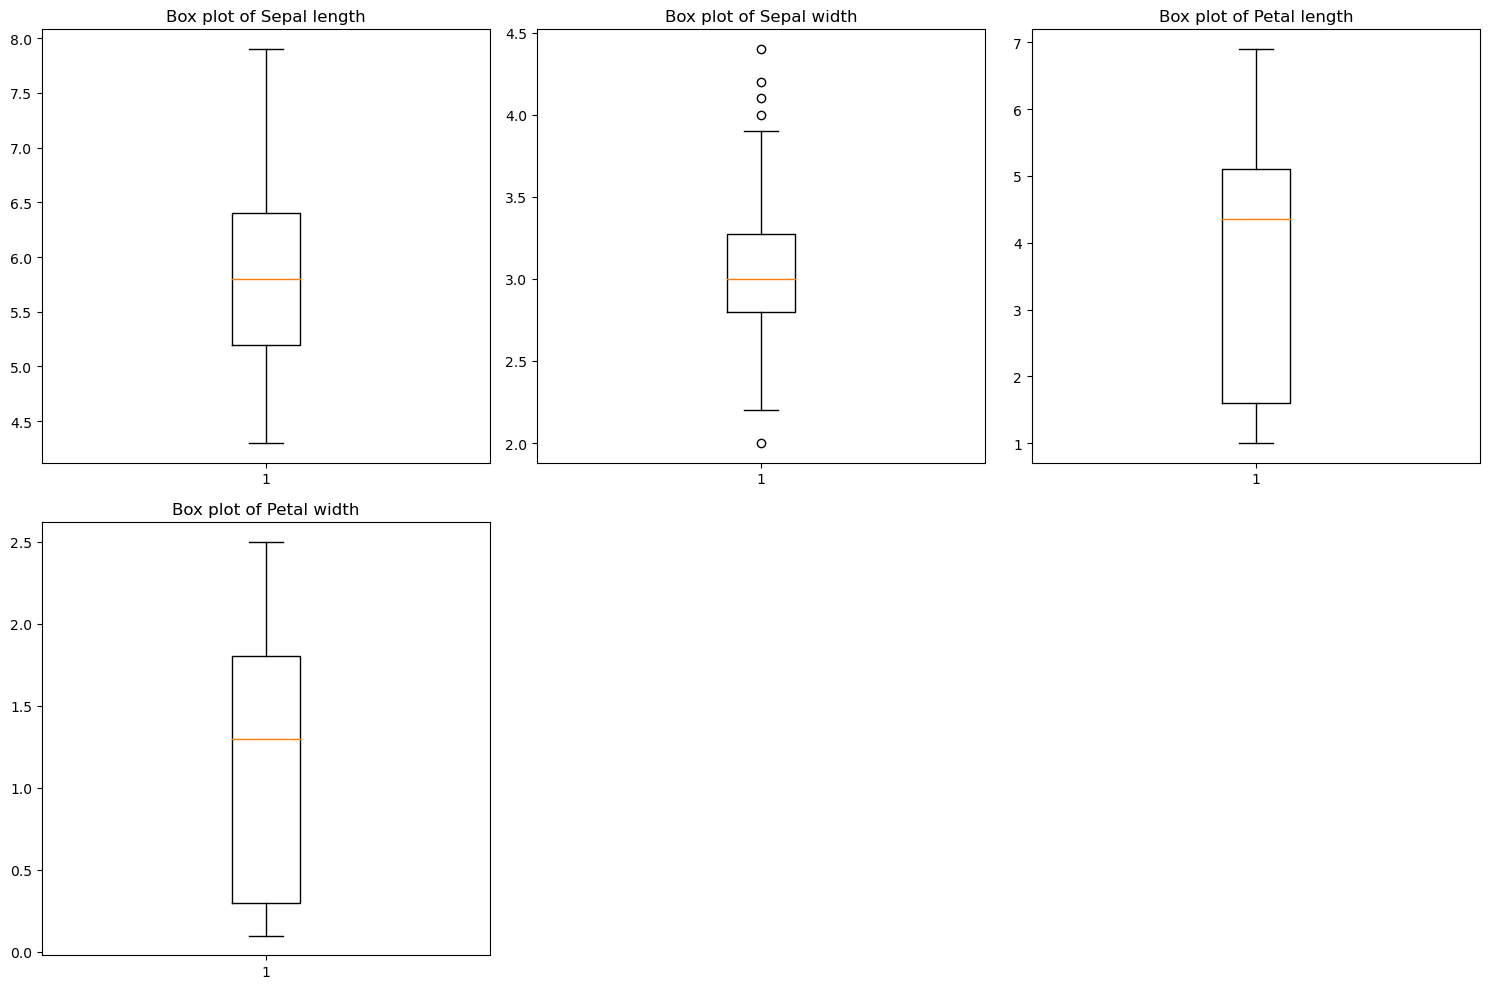

In [15]:
#boxplot for detecting outliers
plt.figure(figsize = (15,10))

#boxplot for SL column
plt.subplot(2,3,1)
plt.boxplot(data['SL'])
plt.title('Box plot of Sepal length')

#boxplot for SW column
plt.subplot(2,3,2)
plt.boxplot(data['SW'])
plt.title('Box plot of Sepal width')

#boxplot for PL column
plt.subplot(2,3,3)
plt.boxplot(data['PL'])
plt.title('Box plot of Petal length')

#boxplot for PW column
plt.subplot(2,3,4)
plt.boxplot(data['PW'])
plt.title('Box plot of Petal width')

plt.tight_layout()
plt.show()

there are outliers in Sepal width column.

In [16]:
#Handle outliers in Sepal width column
Q1 = np.percentile(data['SW'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SW'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SW'], 75, interpolation='midpoint')

#find the interquartile range
IQR = Q3-Q1

#find upper limit and lower limit
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR

print('Lower limit is :',low_limit)
print('Upper limit is :',up_limit)

Lower limit is : 2.1249999999999996
Upper limit is : 3.9250000000000003


In [17]:
#find the outliers
outlier=[]
for x in data['SW']:
    if((x<low_limit) or (x>up_limit)):
        outlier.append(x)
        
print(outlier)

[4.0, 4.4, 4.1, 4.2, 2.0]


In [18]:
#locate the indexes of outliers

ind2 = (data['SW']<low_limit)|(data['SW']>up_limit)
data.loc[ind2].index

Int64Index([14, 15, 32, 33, 60], dtype='int64')

In [19]:
data.loc[[14,15,32,33,60]]

,SL,SW,PL,PW,Classification
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


We can impute this column using Quantile capping and flooring.
The data points which are lesser than lower limit(q1-1.5*IQR) are replaced with the lower limit value and the data points which are greater than upper limit(q3+1.5*IQR) are replaced with the upper limit value.

In [20]:
#capping/flooring the outlier at the upper and lower limits
data['SW'] = np.where(data['SW']<low_limit,low_limit,np.where(data['SW']>up_limit,up_limit,data['SW']))
data['SW'].describe()

count    150.000000
mean       3.043472
std        0.402836
min        2.125000
25%        2.800000
50%        3.000000
75%        3.275000
max        3.925000
Name: SW, dtype: float64

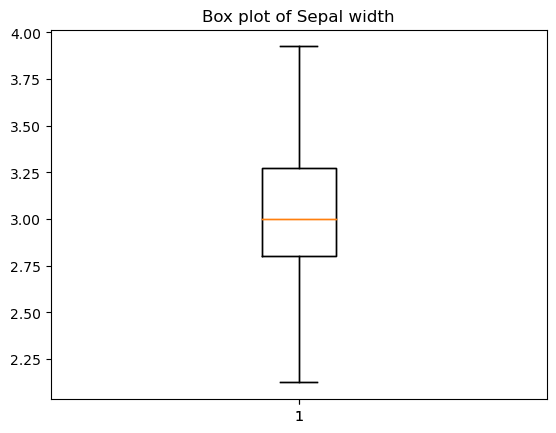

In [22]:
#again check for outliers in the Sepal width column
plt.boxplot(data['SW'])
plt.title('Box plot of Sepal width')
plt.show()

Outliers are handled successfully.

### Label Encoding--:

In [34]:
#label encoding on Classification column
label_encoder = LabelEncoder()
data['Classification'] = label_encoder.fit_transform(data['Classification'])

Here we cannot do one hot encoding on the classification column, since it is a target vector.

In [35]:
data.describe()

,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.043472,3.780000,1.198667,1.000000
std,0.808480,0.402836,1.729424,0.763161,0.819232
min,4.300000,2.125000,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.275000,5.100000,1.800000,2.000000
max,7.900000,3.925000,6.900000,2.500000,2.000000


Now we have to split the columns into feature matrix and target vector.

In [36]:
#target vector
y = data['Classification']

#feature matrix
X = data.drop('Classification',axis=1)

### Standard Scaling--:

In [41]:
#standard scaling
standardisation = preprocessing.StandardScaler()
#applying standard scaling on X
standardised_X = standardisation.fit_transform(X)
#converting into dataframe
X = pd.DataFrame(standardised_X, columns = X.columns)

X.describe()

,SL,SW,PL,PW
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-8.599603e-17,-1.409983e-16,1.421085e-16,1.609823e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.930976e+00,-2.287654e+00,-1.612857e+00,-1.444450e+00
25%,-8.140476e-01,-6.064203e-01,-1.264758e+00,-1.181504e+00
50%,-6.942837e-02,-1.082770e-01,3.306937e-01,1.332259e-01
75%,6.751909e-01,5.766701e-01,7.658171e-01,7.905908e-01
max,2.536739e+00,2.195636e+00,1.810113e+00,1.710902e+00


# 3.Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

Now we have to split the dataset into training and testing set. We are going to take 20% of the dataset as testing set.

In [43]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, test_size=0.2)

In [44]:
X_train.shape

(120, 4)

120 records are taken as training set and remaining 30 records as testing set.

### Logistic Regression--:

In [48]:
#logistic regression
from sklearn.linear_model import LogisticRegression
#creating an instance of the logistic regression model
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
#training the model
logistic_model.fit(X_train,y_train)
#testing the model
y_pred = logistic_model.predict(X_test)

In [52]:
#evaluate the performance of the model
#measuring performance
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

print("Accuracy is:",accuracy_score(y_test,y_pred))

Accuracy is: 0.9666666666666667


In [53]:
#check for confusion matrix
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

There is only 1 misclassification.

### KNN(K-Nearest Neighbours)--:

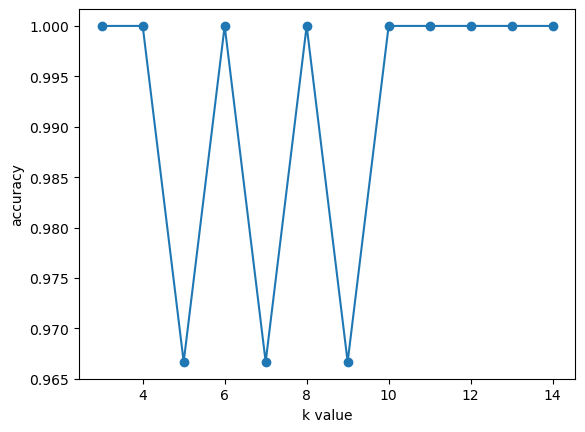

In [55]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
acc_scores = []
#to find optimum k value, we have to use varied k values
neighbors = np.arange(3,15)
#creating a loop for each KNN values
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_scores.append(acc)

#checking for which k value we got highest accuracy
plt.plot(neighbors,acc_scores,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.show()

Highest Accuracy is 1.

In [56]:
#check confusion matrix
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

There are no misclassification that we have to deal with in this model. KNN classified the test data perfectly.

## SVM--:

### Linear SVM

In [57]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
#training the model
svm_linear.fit(X_train, y_train)
#testing the model
y_pred = svm_linear.predict(X_test)

In [58]:
#evaluate the performance of the model
print('Accuracy is:', accuracy_score(y_test, y_pred))

Accuracy is: 0.9666666666666667


In [59]:
#check for confusion matrix
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

There is 1 misclassification.

### Polynomial SVM

In [60]:
svm_poly = SVC(kernel='poly', degree=3)
#training the model
svm_poly.fit(X_train,y_train)
#testing the model
y_pred_p = svm_poly.predict(X_test)

In [61]:
#evaluate the performance of the model
print('Accuracy is:', accuracy_score(y_test, y_pred))

Accuracy is: 0.9666666666666667


In [62]:
#check for confusion matrix
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

There is 1 misclassification.

### SVM with Radial Basis Function

In [63]:
svm_rbf = SVC(kernel='rbf')
#training the model
svm_rbf.fit(X_train, y_train)
#testing the model
y_pred = svm_rbf.predict(X_test)

In [64]:
#evaluate the performance of the model
print('Accuracy is:', accuracy_score(y_test, y_pred))

Accuracy is: 1.0


In [65]:
#check for confusion matrix
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

There are no misclassifications.

## Decision Tree Classifier--:

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
#training the model
dt_model.fit(X_train,y_train)
#testing the model
y_pred = dt_model.predict(X_test)

In [67]:
#evaluate the performance of the model
print('Accuracy is:', accuracy_score(y_test, y_pred))

Accuracy is: 1.0


In [68]:
#check for confusion matrix
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Accuracy score is 1, and there are no misclassifications.

## Random Forest Classifier--:

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
#training the model 
rf_model.fit(X_train,y_train)
#testing the model
y_pred = rf_model.predict(X_test)

In [70]:
#evaluate the performance of the model
print('Accuracy is:', accuracy_score(y_test, y_pred))

Accuracy is: 1.0


In [71]:
#check for confusion matrix
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

There are no misclassifications.

### Conclusion--:
From the above implemented machine learning models, KNN, Radial basis function SVM, Decision Tree classifier and Random Forest gave us the best results. They all predicted the data with 100% accuracy, and there were no misclassifications.